# Camp Fire Simulation: Run Simulation

This notebook demonstrates code to run a wildfire evacuation agent-based model for the city of Paradise, CA. 

This notebook is a companion to the forthcoming manuscript, "Evaluating Routing Strategies for Emergency Evacuation: A Spatially Explicit Agent-Based Modeling Approach" by Rebecca Vandewalle, Furqan Baig, Santiago Nunez-Corrales, Jeon Young Kang, and Shaowen Wang.

Notebook author: Rebecca Vandewalle
<br>Last updated: 11-12-24

<a id='top'></a>
## Table of Contents
- [Introduction](#intro)
- [Quick Start](#quick_start)
- [Import Libraries and Setup](#import_lib)
- [Model Overview](#mod_overview)
- [Running with CyberGIS Compute](#run_compute)
- [Analyzing Simulation Results](#analyz_res)

<a id='intro'></a>
## Introduction

The main code base is flexible and can serve a variety of purposes; not all available parameters are used in the manuscript. Broadly, the code models the process of evacuation on a road network in which roads are progressively closed by wildfire spread. Individual households, represented by a vehicle, must navigate out of the danger zone and re-route if the road they are currently on becomes blocked by the wildfire. 

For a more detailed explanation and discussion of the base agent-based model and code, please refer to the [Evaluating Routing Strategies for Emergency Evacuation Notebook](https://cybergisxhub.cigi.illinois.edu/notebook/evaluating-routing-strategies-for-emergency-evacuation/) on CyberGISX.

<a id='quick_start'></a>
## Quick Start
([back to Table of Contents](#top))

In the quick start, this notebook is set up to run a small sample simulation to showcase working code.

First, install legacy software versions (for backwards compatibility). If the correct versions are not printed, uncomment the first two lines to install older versions of networkx and osmnx. 

Note: You will need to use the `Python 3-0.8.0 kernel` on CyberGISX.

Expected output:

```Networkx version is  2.5.1
OSMnx version is  1.0.1```

In [1]:
#%pip install --upgrade networkx==2.5.1
#%pip install --upgrade osmnx==1.0.1

import networkx
import osmnx
print("Networkx version is ", networkx.__version__)
print("OSMnx version is ",osmnx.__version__)

Networkx version is  2.5.1
OSMnx version is  1.0.1


In [4]:
# Import functons
from FireABM_24 import *

Create an output directory to save generated results.

In [11]:
# determine current path and make output directory for quick start

import os
out_path = os.getcwd() # save current path 
if not os.path.isdir('demo_camp_quick_start'): # create quick start output directory
    os.mkdir('demo_camp_quick_start')

The following line of code runs the wildfire agent-based model evacuation simulation one time and saves the results in the `demo_camp_quick_start` folder. 

Important parameters (these will be described in more depth later on):
- `-nv`: number of vehicles to include in the simulation
- `-sd`: seed, this number is used to set the randomization of the initial vehicle positions
- `-epath`: current path
- `-ofd`: name of the output directory used to store results
- `-strat`: driving strategy used (`quickest`, `dist`, or `dist+road_type_weight`)
- `-rg`: formatted Osmnx road graph stored as a pickle file
- `-exdsc`: experiment description (a tag to help keep track of runs)

In [12]:
# run a small simulation

!python run_fireabm_24.py -nv 10 -sd 1 -epath "$out_path" \
-ofd demo_camp_quick_start -strat dist+road_type_weight -rg Paradise_fire_2000.pkl \
-exdsc 'demo_run' -strd 1.0


!! starting file parse at: 13:26:51

!! checking input parameters
!! input parameters OK

!! starting full run at 13:26:51 

!! run simulation

run params: 100% short major roads i: 0 j: 1 SEED: 1 strat_perc 1.0
	END init
	Finished at frame_number 89

success! no: 1 run_time: 0:00:37.170850 timestamp: 13:27:28

bad_seeds []

!! ending full run at 13:27:28, elapsed time: 0:00:37.171144
!! runs completed: 1 / 1
!! Full simulation block complete!



## Show graph for small simulation

To see the network we used, you can view the graph with the following code.

In [5]:
road_graph_pkl = 'Paradise_fire_2000.pkl'
road_graph = load_road_graph(road_graph_pkl)
gdf_nodes, gdf_edges = get_node_edge_gdf(road_graph)
(bbox, lbbox, poly, x, y) = create_bboxes(gdf_nodes, 0.1, buff_adj=[2, 2.75, 2.5, 2.5])

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

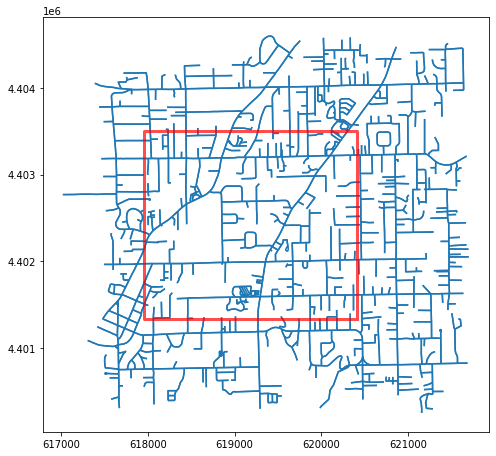

In [6]:
check_graphs(gdf_edges, x, y)

## Run Larger Simulation

Now we can run a small simulation on the larger road network.

In [7]:
# determine current path and make output directory for quick start

import os
out_path = os.getcwd() # save current path 
if not os.path.isdir('camp_fire'): # create quick start output directory
    os.mkdir('camp_fire')

In [8]:
# run a larger simulation

!python run_fireabm_24.py -nv 10 -sd 1 -epath "$out_path" \
-ofd camp_fire -strat dist -rg Paradise_fire_8000.pkl \
-exdsc 'camp_fire' -strd 1.0


!! starting file parse at: 11:19:35

!! checking input parameters
!! input parameters OK

!! starting full run at 11:19:35 

!! run simulation

run params: 100% shortest distance i: 0 j: 1 SEED: 1 strat_perc 1.0
	END init
	fire spreads.... 2.0
	fire spreads.... 3.0
	fire spreads.... 4.0
	fire spreads.... 5.0
	Finished at frame_number 403

success! no: 1 run_time: 0:13:50.156589 timestamp: 11:33:25

bad_seeds []

!! ending full run at 11:33:25, elapsed time: 0:13:50.156902
!! runs completed: 1 / 1
!! Full simulation block complete!



## Check Larger graph

As above, we can check the larger graph with the following code:

In [9]:
road_graph_pkl = 'Paradise_fire_8000.pkl'
road_graph = load_road_graph(road_graph_pkl)
gdf_nodes, gdf_edges = get_node_edge_gdf(road_graph)
(bbox, lbbox, poly, x, y) = create_bboxes(gdf_nodes, 0.1, buff_adj=[2, 2.75, 2.5, 2.5])

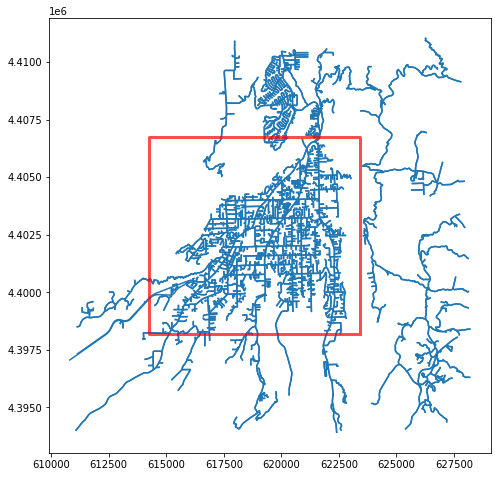

In [10]:
# display road graph

check_graphs(gdf_edges, x, y);